In [1]:
import numpy as np
import pandas as pd

import librosa

import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, \
        Flatten, Activation, ConvLSTM2D, Conv2D, GlobalMaxPooling2D, \
        BatchNormalization, MaxPooling2D, Bidirectional
from tensorflow.keras.utils import to_categorical

from timeit import default_timer

In [3]:
tracks = pd.read_csv('../data/tracks_meta.csv', index_col = 0)

# pre-computed melspectograms saved as numpy files
data = [(idx, np.load('D:/GA-DSI/capstone-data/audio/' + str(idx) + '.npy')) for idx in tracks.index]
raw_data = pd.DataFrame(data, columns = ['idx', 'audio']).set_index('idx')

df = pd.merge(
    tracks,
    raw_data,
    how = 'inner',
    left_index = True,
    right_index = True
)

del tracks 
del data
del raw_data

In [4]:
X_train = np.array([x for x in df[df['split'] == 'training']['audio'].values])
X_val = np.array([x for x in df[df['split'] == 'validation']['audio'].values])
X_test = np.array([x for x in df[df['split'] == 'test']['audio'].values])

df.drop('audio',  axis = 1, inplace = True)

genre_map = {
    'Hip-Hop' : 0,
    'Pop' : 1,
    'Folk' : 2,
    'Experimental' : 3,
    'Rock' : 4,
    'International' : 5,
    'Electronic' : 6,
    'Instrumental' : 7
}

y_train = to_categorical(df[df['split'] == 'training']['genre_top'].map(genre_map))
y_val = to_categorical(df[df['split'] == 'validation']['genre_top'].map(genre_map))
y_test = to_categorical(df[df['split'] == 'test']['genre_top'].map(genre_map))

In [5]:
model = Sequential()

model.add(Input(shape = (1291, 128, 1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#model.add(Conv2D(32, kernel_size = 4, activation = 'relu'))
# model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size = 2, strides = 2))
#model.add(Dropout(0.2))

#model.add(GlobalMaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation = 'relu', kernel_regularizer = l2()))
model.add(Dropout(0.1))
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2()))

model.add(Dense(8, activation = 'softmax'))

model.compile(
              loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy']
              )

In [6]:
start = default_timer()

history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), batch_size = 64)

print((default_timer() - start)/ 60)

Epoch 1/10
100/100 [==============================] - 486s 5s/step - loss: 22.0229 - accuracy: 0.1570 - val_loss: 3.4985 - val_accuracy: 0.1175
Epoch 2/10
100/100 [==============================] - 479s 5s/step - loss: 2.9705 - accuracy: 0.1379 - val_loss: 2.6083 - val_accuracy: 0.1450
Epoch 3/10
100/100 [==============================] - 478s 5s/step - loss: 2.7415 - accuracy: 0.1350 - val_loss: 2.6507 - val_accuracy: 0.1250
Epoch 4/10
100/100 [==============================] - 478s 5s/step - loss: 2.5590 - accuracy: 0.1307 - val_loss: 2.5228 - val_accuracy: 0.1562
Epoch 5/10
100/100 [==============================] - 480s 5s/step - loss: 2.5937 - accuracy: 0.1608 - val_loss: 2.3752 - val_accuracy: 0.1975
Epoch 6/10
100/100 [==============================] - 478s 5s/step - loss: 2.4772 - accuracy: 0.1791 - val_loss: 2.4143 - val_accuracy: 0.1863
Epoch 7/10
100/100 [==============================] - 478s 5s/step - loss: 2.4547 - accuracy: 0.1913 - val_loss: 2.8901 - val_accuracy: 0.200

In [7]:
predictions = model.predict(X_test, batch_size = 64)

13/13 [==============================] - 12s 878ms/step


In [13]:
np.mean(np.argmax(predictions, axis = 1) == np.argmax(y_test, axis = 1))

0.20625

In [14]:
df[df['split'] == 'test']['genre_top'].value_counts(normalize = True)

Rock             0.125
International    0.125
Folk             0.125
Experimental     0.125
Instrumental     0.125
Pop              0.125
Hip-Hop          0.125
Electronic       0.125
Name: genre_top, dtype: float64

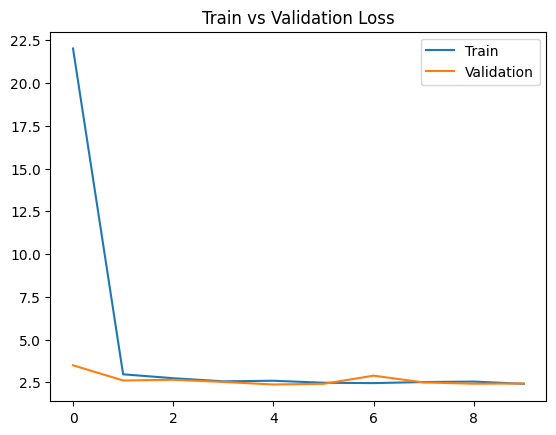

In [25]:
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.title('Train vs Validation Loss')
plt.legend();

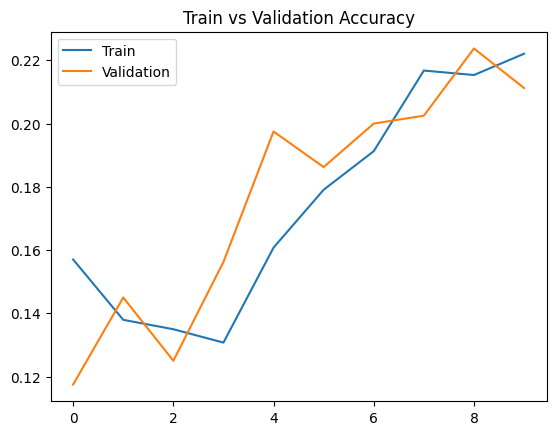

In [26]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.title('Train vs Validation Accuracy')
plt.legend();

In [7]:
model = Sequential()

model.add(Input(shape = (1291, 128, 1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 16, kernel_size = (20, 2), activation = 'relu')) # (2/128) * (1291) = 20.17 so this is proportional 
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 16, kernel_size = (20, 2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# model.add(GlobalMaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation = 'relu', kernel_regularizer = l2()))
model.add(Dropout(0.1))
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2()))

model.add(Dense(8, activation = 'softmax'))

model.compile(
              loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy']
              )

In [14]:
start = default_timer()

history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), batch_size = 64)

print((default_timer() - start)/ 60)

Epoch 1/10
100/100 [==============================] - 391s 4s/step - loss: 4.1073 - accuracy: 0.1218 - val_loss: 2.5683 - val_accuracy: 0.1250
Epoch 2/10
100/100 [==============================] - 387s 4s/step - loss: 2.3735 - accuracy: 0.1215 - val_loss: 2.2653 - val_accuracy: 0.1250
Epoch 3/10
100/100 [==============================] - 380s 4s/step - loss: 2.2306 - accuracy: 0.1240 - val_loss: 2.2079 - val_accuracy: 0.1250
Epoch 4/10
100/100 [==============================] - 376s 4s/step - loss: 2.1978 - accuracy: 0.1193 - val_loss: 2.1896 - val_accuracy: 0.1250
Epoch 5/10
100/100 [==============================] - 376s 4s/step - loss: 2.1844 - accuracy: 0.1181 - val_loss: 2.1793 - val_accuracy: 0.1250
Epoch 6/10
100/100 [==============================] - 377s 4s/step - loss: 2.1754 - accuracy: 0.1209 - val_loss: 2.1713 - val_accuracy: 0.1250
Epoch 7/10
100/100 [==============================] - 377s 4s/step - loss: 2.1680 - accuracy: 0.1209 - val_loss: 2.1643 - val_accuracy: 0.1250

In [15]:
predictions = model.predict(X_test, batch_size = 64)
np.mean(np.argmax(predictions, axis = 1) == np.argmax(y_test, axis = 1))

13/13 [==============================] - 7s 519ms/step


0.125

In [20]:
np.argmax(predictions, axis = 1).mean(), np.argmax(predictions, axis = 1).var()

(6.0, 0.0)